1 Построить гистограмму и с помощью описательной статистики охарактеризовать рассматриваемый бизнес-процесс. (Текстовое описание в ячейке Marcdown)
Постройте гистограммы распределения цен для каждой категории (по количеству комнат). Какие выводы можно сделать на основе полученных гистограмм?

In [44]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
df=pd.read_excel("БД_Риэлтор.xlsx")
df.head()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


Text(0.5, 1.0, 'Распределение цен на квартиры')

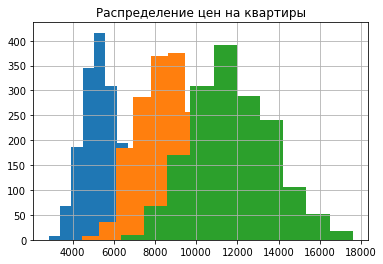

In [45]:
room1=df[df['Rooms']==1]
room2=df[df['Rooms']==2]
room3=df[df['Rooms']==3]
room1['Price'].hist()
room2['Price'].hist()
room3['Price'].hist()
plt.title('Распределение цен на квартиры')

Цены на все квартиры(однокомнатные, двухкомнатные, трехкомнатные) распределены по нормальному закону.

2 Оценить корреляцию
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

In [46]:
room1[['Price','Area']].cov()

,Price,Area
Price,780506.330905,1989.519167
Area,1989.519167,11.899206


In [47]:
import statistics
print('Корреляция room1',1989.519167/(statistics.pstdev(room1['Price'])*statistics.pstdev(room1['Area'])))

Корреляция room1 0.6532254508775661


In [48]:
room2[['Price','Area']].cov()

,Price,Area
Price,1.875752e+06,5793.161991
Area,5.793162e+03,35.914814


In [49]:
print('Корреляция room2',5793.161991/(statistics.pstdev(room2['Price'])*statistics.pstdev(room2['Area'])))

Корреляция room2 0.706233412640702


In [50]:
room3[['Price','Area']].cov()

,Price,Area
Price,3.840079e+06,13052.97479
Area,1.305297e+04,79.99979


In [51]:
print('Корреляция room3',13052.97479/(statistics.pstdev(room3['Price'])*statistics.pstdev(room3['Area'])))

Корреляция room3 0.7451742210435901


Можно сделать вывод, что наиболее вероятна линейная зависимости стоимости трехкомнатных квартир от их площади. 

3 Рассчитать квартили
Рассчитайте границы квартилей распределения цен на 2-х квартиры площадью более 40 кв. метров.

In [52]:
r=room2[room2['Area']>40]['Price']
print("квантиль ряда 25%: ", np.quantile(r, .25))  
print("квантиль ряда 50%: ", np.quantile(r, .50))  
print("квантиль ряда 75%: ", np.quantile(r, .75))
print("квантиль ряда 100%: ", np.quantile(r, 1))

квантиль ряда 25%:  7924.0
квантиль ряда 50%:  8812.0
квантиль ряда 75%:  9684.5
квантиль ряда 100%:  12833


4 Решить задачу
Вы являетесь [риэлтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.
*В каждой категории разная степень корреляции. т.е. у 3 комнатных она может быть иная, чем у однокомнатных.

In [53]:
r3=room3['Price']
print("квантиль ряда 25%: ", np.quantile(r3, .25))  
print("квантиль ряда 50%: ", np.quantile(r3, .50))  
print("квантиль ряда 75%: ", np.quantile(r3, .75))

квантиль ряда 25%:  10320.0
квантиль ряда 50%:  11639.0
квантиль ряда 75%:  13123.0


In [54]:
st=(9200*100/3)/25
print('Необходимая минимальная стоимость одной квартиры: ',st)

Необходимая минимальная стоимость одной квартиры:  12266.666666666668


[0.00604961 0.04113733 0.10284332 0.18693285 0.23653962 0.17422868
 0.14579552 0.06473079 0.03085299 0.01088929]


(10848.4, 11976.0]    392
(9720.8, 10848.4]     309
(11976.0, 13103.6]    287
(13103.6, 14231.2]    241
(8593.2, 9720.8]      170
(14231.2, 15358.8]    107
(7465.6, 8593.2]       68
(15358.8, 16486.4]     51
(16486.4, 17614.0]     18
(6337.999, 7465.6]     10
Name: Price, dtype: int64

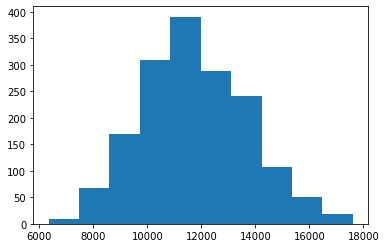

In [55]:
inter=np.linspace(6338,17614,11)
inter=np.linspace(6338,17614,11)
dens,bins,patches=plt.hist(r3,bins=inter)
sum=0
for d in dens:
    sum=sum+d
sum
   
probability=np.array([],dtype=float)
for d in dens:
    probability=np.append(probability,d/sum)
print(probability)
i=1
probability1=np.array([probability[0]],dtype=float)
while i<10:
    probability1=np.append(probability1,probability[i]+probability1[i-1])
    i=i+1
intervals=r3.value_counts(bins=inter)
intervals

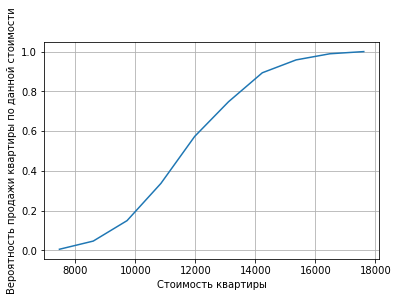

In [56]:
bins=np.delete(bins,0)
plt.plot(bins,probability1)
plt.ylabel('Вероятность продажи квартиры по данной стоимости')
plt.xlabel('Стоимость квартиры')
plt.grid(True)

Вероятность продажи квартиры по необходимой для получения нужной прибыли стоимости примерно 65%